Loan Portfolio Valuation Analysis
 "This notebook analyzes a loan portfolio to validate the client's valuation as of December 31, 20.n"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = r'C:\Users\Admin\Downloads\Data.csv'
df = pd.read_csv(file_path, sep=';')

In [20]:
df.head()

,Unnamed: 0,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
0,31.05.2019,10018746.17,1443069.08,3332200.33,1328138.75,928085.74,736418.27,539403.31,427557.86,324459.32,...,116684.68,92699.67,63399.66,53265.12,37121.13,29787.10,24524.90,18085.94,16581.01,11442.97
1,30.06.2019,10868379.04,0.00,1392751.60,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,...,255222.42,198833.96,161996.73,138461.91,92346.68,79641.30,63457.44,52373.85,43374.70,37404.87
2,31.07.2019,10733932.61,0.00,0.00,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,...,302575.54,258652.52,191798.05,170027.54,127574.33,110301.21,89766.69,64746.84,61408.92,50312.70
3,31.08.2019,12558727.02,0.00,0.00,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,...,417223.56,336686.08,253556.20,200066.59,151859.74,109973.00,90228.14,70661.50,53102.83,47069.84
4,30.09.2019,14505071.44,0.00,0.00,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,...,628429.48,589692.85,457299.31,323764.87,288152.28,239872.99,192246.98,171550.69,142575.97,116853.05


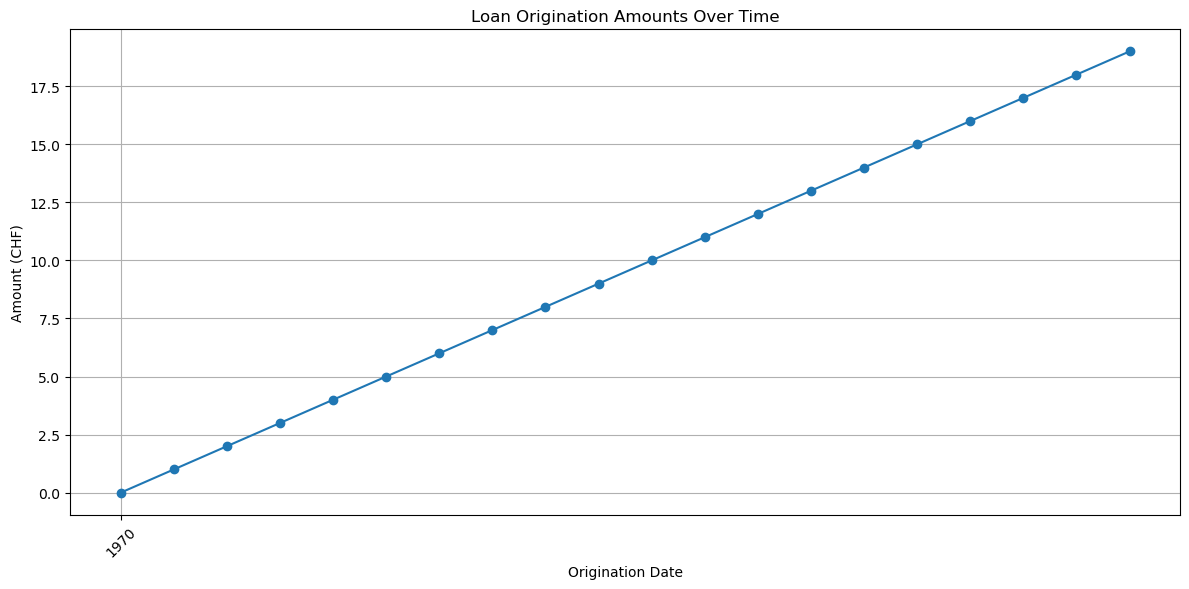

In [67]:
# Creating a plot of origination amounts over time
plt.figure(figsize=(12, 6))
origination_amounts = pd.Series(df.index.astype(float), index=pd.to_datetime(df.index))
plt.plot(origination_amounts.index, origination_amounts.values, marker='o')
plt.title('Loan Origination Amounts Over Time')
plt.xlabel('Origination Date')
plt.ylabel('Amount (CHF)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


    Calculate Historical Repayment Percentages

In [57]:
repayment_pct = df.iloc[:, 2:].div(df['Origination Amount'], axis=0) * 100
repayment_pct.insert(0, 'Vintage', df['Unnamed: 0'])


In [65]:
repayment_pct.head()

,Vintage,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
0,31.05.2019,14.403689,33.259654,13.256537,9.263492,7.350404,5.383940,4.267579,3.238522,2.366128,...,1.164664,0.925262,0.632810,0.531655,0.370517,0.297314,0.244790,0.180521,0.165500,0.114216
1,30.06.2019,0.000000,12.814713,27.712365,11.389635,8.933524,8.210533,6.153328,4.652144,3.860730,...,2.348303,1.829472,1.490533,1.273989,0.849682,0.732780,0.583872,0.481892,0.399091,0.344162
2,31.07.2019,0.000000,0.000000,14.325134,27.514012,11.256975,8.192479,6.624011,6.132435,4.690406,...,2.818869,2.409672,1.786839,1.584019,1.188514,1.027594,0.836289,0.603198,0.572101,0.468726
3,31.08.2019,0.000000,0.000000,0.000000,12.880939,32.503422,11.047895,9.934316,7.057191,5.528814,...,3.322180,2.680893,2.018964,1.593048,1.209197,0.875670,0.718450,0.562649,0.422836,0.374798
4,30.09.2019,0.000000,0.000000,0.000000,0.000000,13.734802,27.097044,9.614712,8.465354,6.476525,...,4.332481,4.065425,3.152686,2.232080,1.986562,1.653718,1.325378,1.182695,0.982939,0.805601


In [71]:
origination_amounts = pd.Series(df.iloc[:, 0].values, index=df.index)

In [93]:
# Geting origination amounts (first column for each vintage)
origination_amounts = df.iloc[:, 0]

In [97]:
# Calculating mean repayment pattern
mean_repayments = repayment_pct.mean()

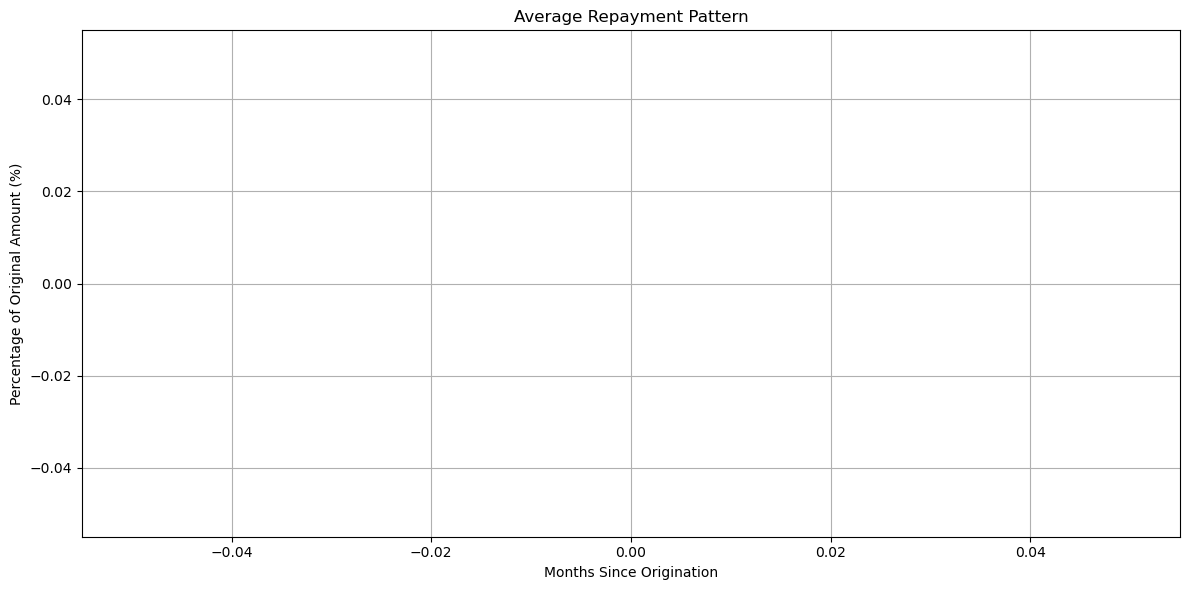

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(mean_repayments) + 1), mean_repayments.values, marker='o')
plt.title('Average Repayment Pattern')
plt.xlabel('Months Since Origination')
plt.ylabel('Percentage of Original Amount (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [111]:
#Calculating Expected Repayment Percentages
expected_repayments = repayment_pct.mean()

In [113]:
print("\nExpected Repayment Percentages (first 6 months):")
display(expected_repayments.head(6))


Expected Repayment Percentages (first 6 months):


Series([], dtype: float64)

In [115]:
# Forecast Future Cash Flows
def create_forecast_matrix(df, expected_repayments):
    forecast_matrix = pd.DataFrame(index=df.index, columns=range(1, 37))
    for vintage in df.index:
        orig_amount = float(vintage)
        for period in range(1, 37):
            if period <= len(expected_repayments):
                forecast_matrix.loc[vintage, period] = orig_amount * (expected_repayments[period-1] / 100)
    return forecast_matrix

In [117]:
forecast_matrix = create_forecast_matrix(df, expected_repayments)

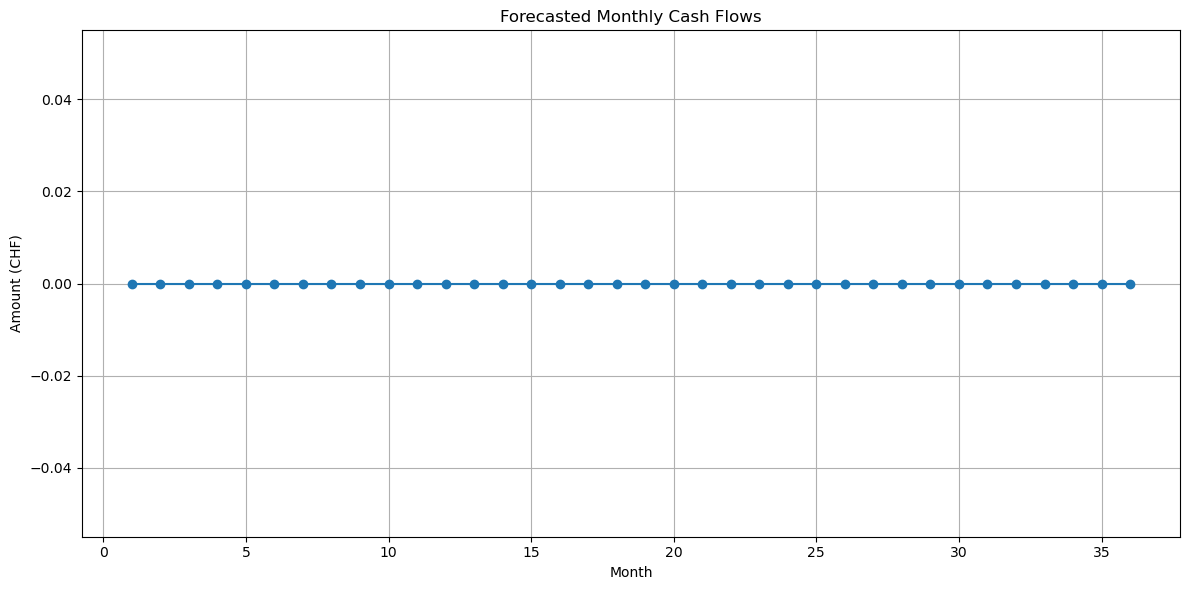

In [119]:
# Visualize forecasted cash flows
plt.figure(figsize=(12, 6))
total_monthly_cashflows = forecast_matrix.sum()
plt.plot(total_monthly_cashflows.index, total_monthly_cashflows.values, marker='o')
plt.title('Forecasted Monthly Cash Flows')
plt.xlabel('Month')
plt.ylabel('Amount (CHF)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [121]:
#  Calculating Present Value
def calculate_present_value(forecast_matrix, annual_rate=0.10):
    monthly_rate = (1 + annual_rate)**(1/12) - 1
    discount_factors = pd.Series([(1 + monthly_rate)**(-i) for i in range(1, 37)])
    pv_matrix = forecast_matrix.multiply(discount_factors, axis=1)
    return pv_matrix.sum().sum()

In [123]:
portfolio_value = calculate_present_value(forecast_matrix)

In [125]:
# Comparing with Client's Estimate
client_estimate = 84993122.67
absolute_diff = abs(portfolio_value - client_estimate)
relative_diff = absolute_diff / client_estimate * 100
threshold = 500000

In [127]:
print("\nPortfolio Valuation Results:")


Portfolio Valuation Results:


In [129]:
print(f"Our estimate: CHF {portfolio_value:,.2f}")

Our estimate: CHF 0.00


In [131]:
print(f"Client's estimate: CHF {client_estimate:,.2f}")

Client's estimate: CHF 84,993,122.67


In [133]:
print(f"Absolute difference: CHF {absolute_diff:,.2f}")

Absolute difference: CHF 84,993,122.67


In [135]:
print(f"Relative difference: {relative_diff:.2f}%")

Relative difference: 100.00%


In [137]:
print(f"Threshold check: {'PASSED' if absolute_diff < threshold else 'FAILED'}")

Threshold check: FAILED


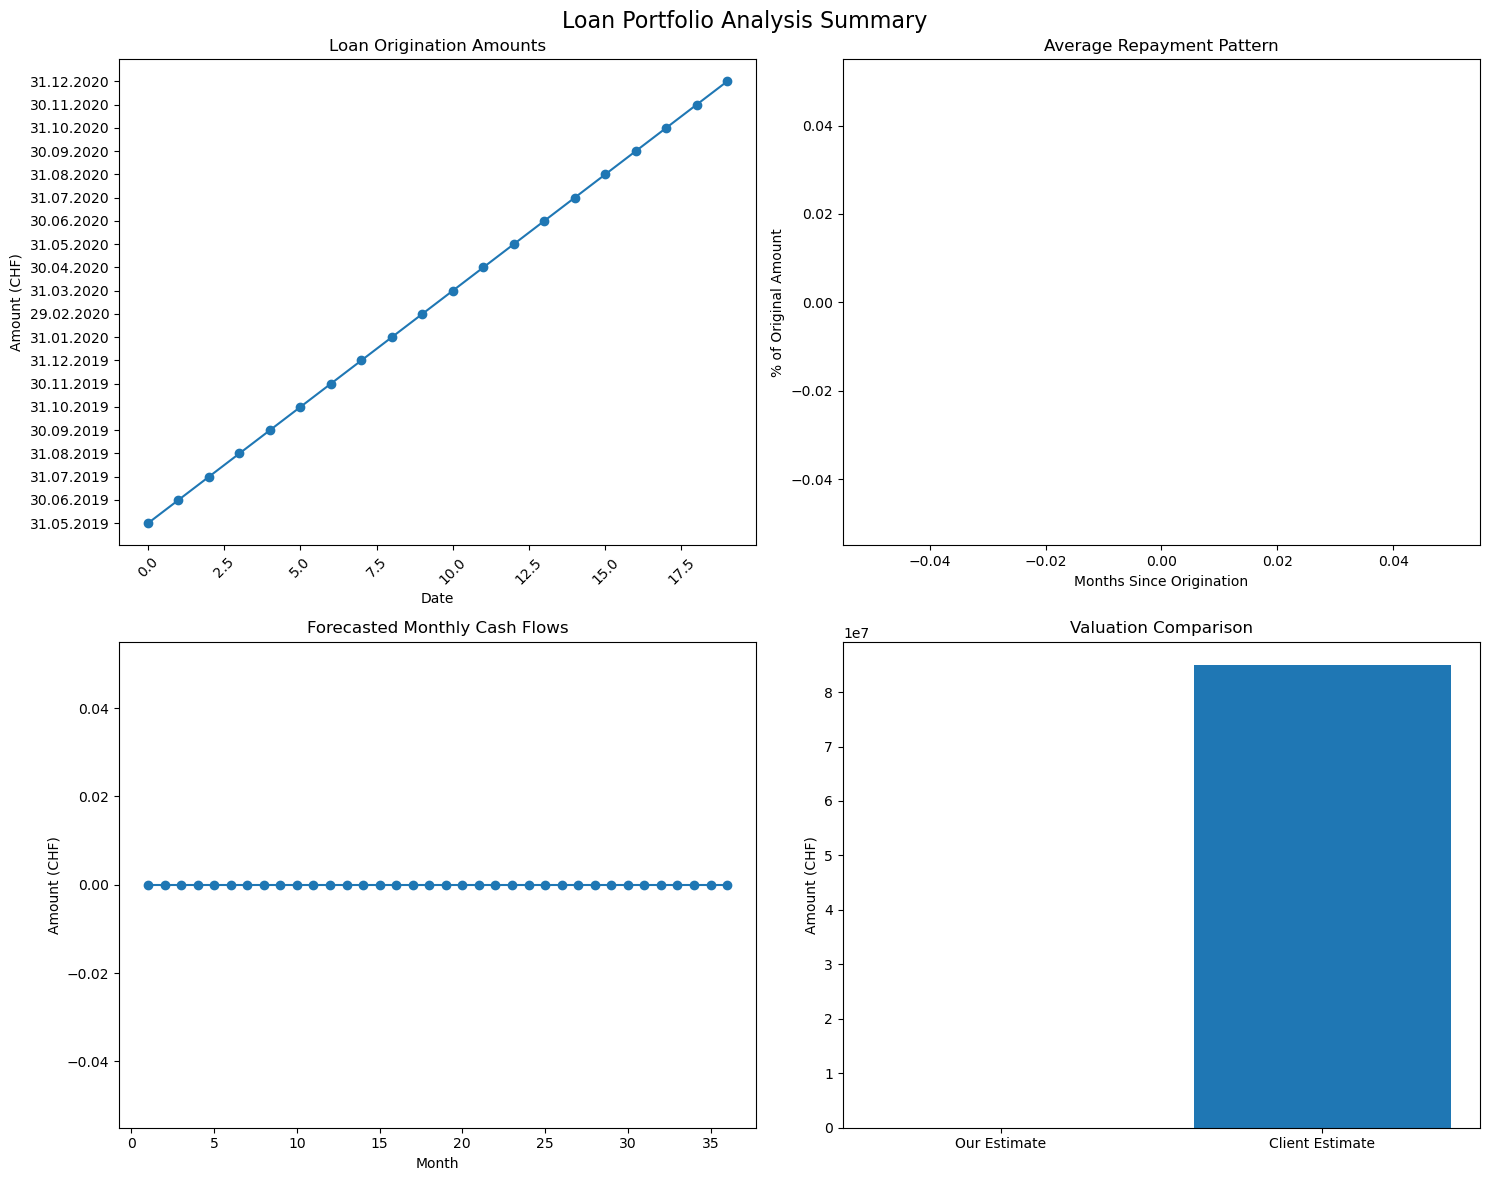

In [139]:
# Creating summary visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Loan Portfolio Analysis Summary', fontsize=16)
axes[0,0].plot(origination_amounts.index, origination_amounts.values, marker='o')
axes[0,0].set_title('Loan Origination Amounts')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Amount (CHF)')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Repayment Pattern
axes[0,1].plot(range(1, len(mean_repayments) + 1), mean_repayments, marker='o')
axes[0,1].set_title('Average Repayment Pattern')
axes[0,1].set_xlabel('Months Since Origination')
axes[0,1].set_ylabel('% of Original Amount')

# Plot 3: Forecasted Cash Flows
axes[1,0].plot(total_monthly_cashflows.index, total_monthly_cashflows.values, marker='o')
axes[1,0].set_title('Forecasted Monthly Cash Flows')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Amount (CHF)')

# Plot 4: Valuation Comparison
comparison = pd.Series([portfolio_value, client_estimate], 
                      index=['Our Estimate', 'Client Estimate'])
axes[1,1].bar(comparison.index, comparison.values)
axes[1,1].set_title('Valuation Comparison')
axes[1,1].set_ylabel('Amount (CHF)')
plt.tight_layout()
plt.show()